In [26]:
from tsvalidation.data_generation import time_series_functions as tsf
from tsvalidation.data_generation import time_series_generation as tsg
from tsvalidation.data_generation import utils as dgu

In [27]:
max_interval_size = 1
samples = 1000

In [28]:
linear_parameters = {
    'max_interval_size':1, 
    'slope':5, 
    'intercept':[5, 30] 
    }

exp_parameters = {
    'max_interval_size': (1, 2),
    'decay_rate': [1, 25],
    'initial_value': [1, 25]
    }

sin_parameters = {
    'max_interval_size': (1, 2), 
    'amplitude':[1,3],
    'frequency':(dgu.FrequencyModulationLinear(1,20), dgu.FrequencyModulationWithStep(10,0.8))
    }

impulse_parameters = {
    'idx': (500, 600),
    'constant': [5, 10]
    }

indicator_parameters = {
    'start_index': (700, 600), 
    'end_index': (800, 900)
    }

In [35]:
generator = tsg.TimeSeriesGenerator(
    length = samples,
    noise_level=0.2,
    functions = [tsf.linear_ts, tsf.indicator_ts ,tsf.frequency_varying_sinusoid_ts, tsf.scaled_unit_impulse_function_ts, tsf.exponential_ts ], 
    parameter_values = [linear_parameters, indicator_parameters, sin_parameters, impulse_parameters, exp_parameters]
    )
generator.generate(100)

[array([32.08934395, 31.25617628, 31.66397206, 31.19431632, 31.35136876,
        31.3500661 , 30.73763129, 30.99273314, 30.80544315, 30.2145239 ,
        30.41585589, 30.35552967, 30.23788233, 30.15885135, 30.32481343,
        30.12362264, 30.61103557, 30.30202903, 29.98996539, 30.34358237,
        30.3395219 , 30.48739569, 29.8307538 , 30.10278206, 30.08216013,
        29.98394889, 30.16883265, 30.1675218 , 30.1163092 , 29.99624149,
        30.09213139, 30.26151999, 30.16274341, 30.25988828, 30.55730856,
        30.10698445, 30.08510742, 30.22445059, 30.54676869, 29.98285162,
        30.14449892, 30.16703533, 30.36590265, 30.0076339 , 30.05032065,
        30.28607982, 30.21732524, 30.28056613, 30.06418322, 30.26589691,
        29.73583279, 29.85129204, 30.11291954, 29.67919354, 29.71829939,
        29.47009026, 29.31511472, 29.09870628, 28.91928495, 28.66921808,
        28.60303773, 28.62913001, 28.32643368, 28.59253039, 27.95255607,
        27.78562343, 27.649688  , 27.30496534, 27.2

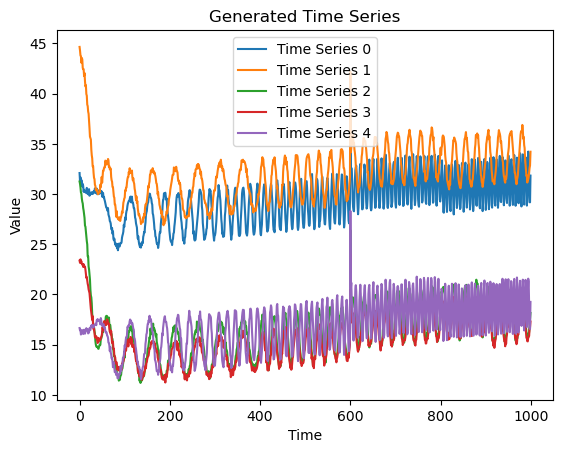

In [39]:
generator.plot(range(5))